In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
df.reset_index()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
X=df.drop(['label'],axis=1)

In [9]:
y=df['label']

In [10]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [11]:
X.shape

(18285, 4)

In [12]:
y.shape

(18285,)

In [13]:
messages=X.copy()

In [14]:
messages.shape

(18285, 4)

In [15]:
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.shape

(18285, 5)

In [18]:
messages.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [19]:
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [20]:
import nltk
import re
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.stem.porter import PorterStemmer

In [23]:
ps=PorterStemmer()
corpus=[]

for i in range(0,len(messages)):
  print(i)
  review=re.sub('^[a-zA-Z]',' ',messages['text'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [24]:
import numpy as np

In [25]:
len(corpus)

18285

In [26]:
from keras.preprocessing.text import one_hot

In [27]:
onehot=[one_hot(String,5000) for String in corpus]

In [28]:
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import LSTM, Dense, Dropout

In [29]:
embedded_input=pad_sequences(onehot,maxlen=20,padding='pre')

In [30]:
embedded_input[142]

array([   0,    0,    0, 3336, 2469, 4112, 4497,  418, 1608, 3393, 4519,
       3202, 2125, 1012,  373, 4271, 4649, 1109, 1988,  917], dtype=int32)

In [31]:
model=Sequential()

In [32]:
model.add(Embedding(5000,40,input_length=20))

In [33]:
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               192800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 393,001
Trainable params: 393,001
Non-trainable params: 0
_________________________________________________________________


In [35]:
import numpy as np

In [36]:
X_final=np.array(embedded_input)
y=np.array(y)

In [37]:
X_final.shape

(18285, 20)

In [38]:
y.shape

(18285,)

In [39]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
filepath='/content/drive/MyDrive/NLP Fake News Clssifier By LSTM RNN  Model/RNN Fake News NLP Model.h5'
callbacks=ModelCheckpoint(
    filepath, monitor='val_accuracy', verbose=0, save_best_only=True,
)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.33,random_state=42)

In [41]:

### Finally Training
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,batch_size=64,callbacks=[callbacks])

Epoch 1/500
192/192 [==============================] - 4s 19ms/step - loss: 0.4136 - accuracy: 0.7960 - val_loss: 0.2908 - val_accuracy: 0.8732
Epoch 2/500
192/192 [==============================] - 2s 8ms/step - loss: 0.2327 - accuracy: 0.9038 - val_loss: 0.2876 - val_accuracy: 0.8698
Epoch 3/500
192/192 [==============================] - 1s 8ms/step - loss: 0.1804 - accuracy: 0.9296 - val_loss: 0.3334 - val_accuracy: 0.8648
Epoch 4/500
192/192 [==============================] - 1s 8ms/step - loss: 0.1362 - accuracy: 0.9488 - val_loss: 0.3812 - val_accuracy: 0.8651
Epoch 5/500
192/192 [==============================] - 2s 8ms/step - loss: 0.1011 - accuracy: 0.9628 - val_loss: 0.3582 - val_accuracy: 0.8669
Epoch 6/500
192/192 [==============================] - 1s 8ms/step - loss: 0.0768 - accuracy: 0.9718 - val_loss: 0.4529 - val_accuracy: 0.8605
Epoch 7/500
192/192 [==============================] - 1s 8ms/step - loss: 0.0596 - accuracy: 0.9787 - val_loss: 0.5200 - val_accuracy: 0.859

In [42]:
import matplotlib.pyplot as plt


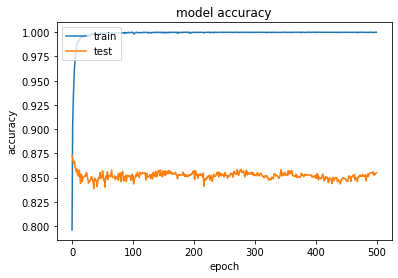

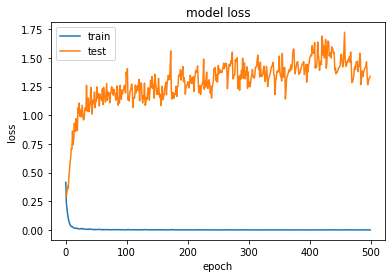

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
y_pred=model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[3000,  419],
       [ 456, 2160]])

Predict by Best Model

In [48]:
from keras.models import load_model

In [49]:
model=load_model('/content/drive/MyDrive/NLP Fake News Clssifier By LSTM RNN  Model/RNN Fake News NLP Model.h5')

In [50]:
y_pred=model.predict_classes(X_test)

In [52]:
confusion_matrix(y_test,y_pred)

array([[3061,  358],
       [ 407, 2209]])